Number of Contours found = 2871


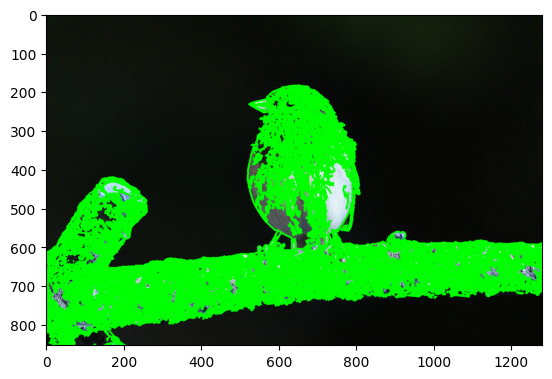

In [14]:
import cv2 
import numpy as np 
  
image = cv2.imread('pictures/dark-eyed-junco.jpg') 
#cv2.waitKey(0) 
  
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY) 
  
edged = cv2.Canny(gray, 30, 200) 
#cv2.waitKey(0) 
  
contours, hierarchy = cv2.findContours(edged,  
    cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_NONE) 
  
cv2.imshow('Canny Edges After Contouring', edged) 
#cv2.waitKey(0) 
  
print("Number of Contours found = " + str(len(contours))) 
  
cv2.drawContours(image, contours, -1, (0, 255, 0), 3) 
  
cv2.imshow('Contours', image) 

# show on screen (optional in jupiter)
%matplotlib inline
plt.imshow(image)
plt.show()

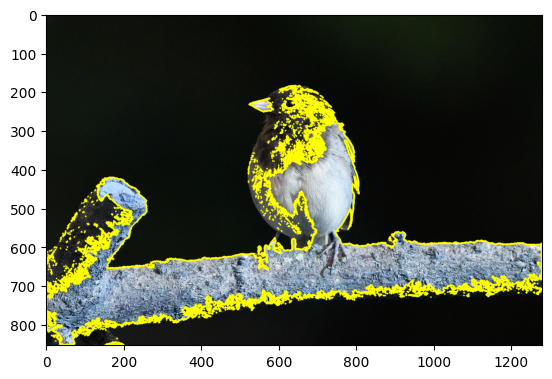

True

In [15]:
import cv2
import numpy as np

image = cv2.imread("pictures/dark-eyed-junco.jpg")
cv2.imshow("Original Image", image)

gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
cv2.imshow("Gray Image", gray)

_, binary = cv2.threshold(gray, 100, 255, cv2.THRESH_BINARY)
cv2.imshow("Binary image", binary)

contours, hierarchy = cv2.findContours(
    binary, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE
)
drawing = np.zeros((gray.shape[0], gray.shape[1], 3), dtype=np.uint8)
CountersImg = cv2.drawContours(drawing, contours, -1, (255, 255, 0), 3)
cv2.imshow("Contours", CountersImg)
ImgWithCounter = cv2.drawContours(image, contours, -1, (255, 255, 0), 3)
cv2.imshow("Image with counters", ImgWithCounter)

# show on screen (optional in jupiter)
%matplotlib inline
plt.imshow(ImgWithCounter)
plt.show()

# save to disk
cv2.imwrite('picture.png', ImgWithCounter)

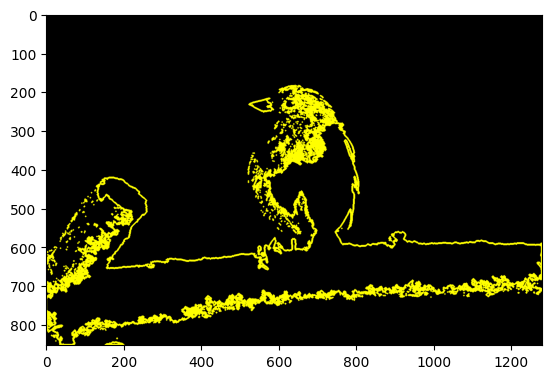

True

In [16]:
import cv2
import numpy as np
from matplotlib import pyplot as plt

image = cv2.imread("pictures/dark-eyed-junco.jpg")
cv2.imshow("Original Image", image)

gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
cv2.imshow("Gray Image", gray)

_, binary = cv2.threshold(gray, 100, 255, cv2.THRESH_BINARY)
cv2.imshow("Binary image", binary)

contours, hierarchy = cv2.findContours(
    binary, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE
)
drawing = np.zeros((gray.shape[0], gray.shape[1], 3), dtype=np.uint8)
CountersImg = cv2.drawContours(drawing, contours, -1, (255, 255, 0), 3)
cv2.imshow("Contours", CountersImg)

# show on screen (optional in jupiter)
%matplotlib inline
plt.imshow(CountersImg)
plt.show()

# save to disk
cv2.imwrite('picture.png', CountersImg)